<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20211205_Compara%C3%A7%C3%A3o_Carteira_vs_d%C3%B3lar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de uma carteira fictícia vs Dólar

## 1. Instalando e importando bibliotecas

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 20.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

## 2. Importando dados

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [ ]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA','CIEL3.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','ETH-USD','USDBRL=X']

In [ ]:
inicio = '2020-01-04'
fim = '2021-12-05'

In [ ]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Vamos converter a cotação do Ethereum para reais:

In [ ]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Agora podemos remover as colunas do Ethereum em dólares e da cotação do dólar

In [ ]:
precos = precos.drop(columns=['USDBRL=X','ETH-USD'])

Vamos normalizar o preço dos ativos para visualizar seus desempenhos

In [ ]:
normalizado = precos/precos.iloc[0]

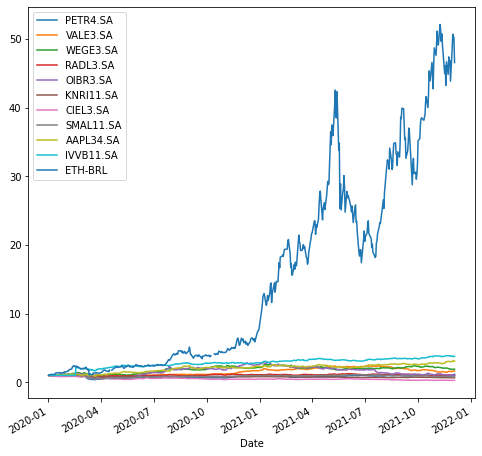

In [ ]:
normalizado.plot(figsize = (8,8));

## 3. Simulação de uma carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [ ]:
compras = {'PETR4.SA': 2000, 'VALE3.SA': 2000, 'WEGE3.SA': 1500, 
           'CIEL3.SA': 2000, 'RADL3.SA': 700, 'OIBR3.SA': 300, 
           'KNRI11.SA': 700, 'SMAL11.SA': 1500, 'AAPL34.SA': 500, 
           'IVVB11.SA': 700, 'ETH-BRL': 100}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [ ]:
sum(compras.values())

12000

Obtendo preços dos ativos no primeiro dia do investimento

In [ ]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [ ]:
qtd_acoes = compras_df/primeiro

Criando um dataframe que contém a posição diária de cada ativo

In [ ]:
PL = precos*qtd_acoes

In [ ]:
PL.head(3)

,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,
2020-01-02,500.000000,2000.000000,100.000000,700.0,700.000000,300.000000,2000.000000,700.000000,1500.000000,2000.000000,1500.000000
2020-01-03,500.988934,1974.329512,105.493049,700.0,700.000000,300.000000,1983.713346,684.394369,1515.053698,1985.274937,1480.845444
2020-01-06,503.461333,1925.321169,114.407254,700.0,694.318601,320.930233,2007.166024,670.922280,1495.698990,1973.495059,1484.676488


In [ ]:
PL.tail()

,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,
2021-11-29,1509.324331,505.375231,4871.292924,2677.441077,447.670332,310.465106,2102.835938,697.865280,1189.247295,3135.531072,2810.662655
2021-11-30,1544.117479,505.375231,5069.109924,2644.915710,447.565126,306.976737,2099.981698,690.766208,1169.892506,3155.832935,2795.052654
2021-12-01,1584.263556,490.726687,5038.498640,2630.303030,449.599174,296.511631,2111.398502,673.172976,1149.462382,3168.465579,2817.600580
2021-12-02,1547.964865,522.465257,5017.685994,2649.158249,450.651289,296.511631,2273.362662,686.136419,1173.655930,3306.519067,2837.546619
2021-12-03,1535.084602,537.113801,4654.678018,2624.457958,453.246498,293.023242,2305.426984,704.346973,1194.193522,3242.455062,2842.749732


Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [ ]:
PL['Carteira 01'] = PL.sum(axis = 1)

In [ ]:
PL.head()

,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Carteira 01
Date,,,,,,,,,,,,
2020-01-02,500.000000,2000.000000,100.000000,700.0,700.000000,300.000000,2000.000000,700.000000,1500.000000,2000.000000,1500.000000,12000.000000
2020-01-03,500.988934,1974.329512,105.493049,700.0,700.000000,300.000000,1983.713346,684.394369,1515.053698,1985.274937,1480.845444,11930.093289
2020-01-06,503.461333,1925.321169,114.407254,700.0,694.318601,320.930233,2007.166024,670.922280,1495.698990,1973.495059,1484.676488,11890.397431
2020-01-07,504.697501,1869.312017,113.899953,700.0,697.019017,327.906970,1999.348515,661.717276,1498.924666,1987.851651,1496.169122,11856.846687
2020-01-08,508.941819,1827.304833,112.246260,700.0,657.565110,320.930233,1986.970462,670.556515,1486.021473,1988.219778,1439.557477,11698.313960


In [ ]:
PL.tail()

,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Carteira 01
Date,,,,,,,,,,,,
2021-11-29,1509.324331,505.375231,4871.292924,2677.441077,447.670332,310.465106,2102.835938,697.865280,1189.247295,3135.531072,2810.662655,20257.711242
2021-11-30,1544.117479,505.375231,5069.109924,2644.915710,447.565126,306.976737,2099.981698,690.766208,1169.892506,3155.832935,2795.052654,20429.586208
2021-12-01,1584.263556,490.726687,5038.498640,2630.303030,449.599174,296.511631,2111.398502,673.172976,1149.462382,3168.465579,2817.600580,20410.002737
2021-12-02,1547.964865,522.465257,5017.685994,2649.158249,450.651289,296.511631,2273.362662,686.136419,1173.655930,3306.519067,2837.546619,20761.657983
2021-12-03,1535.084602,537.113801,4654.678018,2624.457958,453.246498,293.023242,2305.426984,704.346973,1194.193522,3242.455062,2842.749732,20386.776392


## 4. Obtendo dados do IBOV (ou outros benchmarks)

Obtendo dados do IBOV para comparar com a nossa carteira

In [ ]:
dolar = yf.download('USDBRL=X', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [ ]:
dolar.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,4.016786,4.018200,4.016300,4.016786,4.016786,0
2020-01-02,4.016300,4.038700,4.000820,4.016300,4.016300,0
2020-01-03,4.023700,4.067005,4.021125,4.023400,4.023400,0
2020-01-06,4.057000,4.066200,4.044942,4.057000,4.057000,0
2020-01-07,4.060500,4.090600,4.043024,4.060400,4.060400,0


In [ ]:
dolar.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
dolar.rename(columns = {'Adj Close': 'Dolar'}, inplace = True)

In [ ]:
dolar = dolar.drop(dolar.columns[[0,1,2,3,5]], axis = 1)

In [ ]:
dolar

,Dolar
Date,
2020-01-01,4.016786
2020-01-02,4.016300
2020-01-03,4.023400
2020-01-06,4.057000
2020-01-07,4.060400
...,...
2021-11-29,5.607800
2021-11-30,5.600700
2021-12-01,5.620871


Verificando se o índice dos dataframes está no formato 'data'

In [ ]:
dolar.index = pd.to_datetime(dolar.index)

In [ ]:
PL.index = pd.to_datetime(PL.index)

Juntando tudo num dataframe só

In [ ]:
novo_df = pd.merge(dolar, PL, how = 'inner', on = 'Date')

In [ ]:
novo_df.head()

,Dolar,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2020-01-02,4.0163,500.000000,2000.000000,100.000000,700.0,700.000000,300.000000,2000.000000,700.000000,1500.000000,2000.000000,1500.000000,12000.000000
2020-01-03,4.0234,500.988934,1974.329512,105.493049,700.0,700.000000,300.000000,1983.713346,684.394369,1515.053698,1985.274937,1480.845444,11930.093289
2020-01-06,4.0570,503.461333,1925.321169,114.407254,700.0,694.318601,320.930233,2007.166024,670.922280,1495.698990,1973.495059,1484.676488,11890.397431
2020-01-07,4.0604,504.697501,1869.312017,113.899953,700.0,697.019017,327.906970,1999.348515,661.717276,1498.924666,1987.851651,1496.169122,11856.846687
2020-01-08,4.0662,508.941819,1827.304833,112.246260,700.0,657.565110,320.930233,1986.970462,670.556515,1486.021473,1988.219778,1439.557477,11698.313960


Normalizando esse novo dataframe que contém o IBOV, todos os ativos e o PL da nossa carteira

In [ ]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [ ]:
PL_normalizado.head()

,Dolar,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-01-03,1.001768,1.001978,0.987165,1.054930,1.0,1.000000,1.000000,0.991857,0.977706,1.010036,0.992637,0.987230,0.994174
2020-01-06,1.010134,1.006923,0.962661,1.144073,1.0,0.991884,1.069767,1.003583,0.958460,0.997133,0.986748,0.989784,0.990866
2020-01-07,1.010980,1.009395,0.934656,1.139000,1.0,0.995741,1.093023,0.999674,0.945310,0.999283,0.993926,0.997446,0.988071
2020-01-08,1.012424,1.017884,0.913652,1.122463,1.0,0.939379,1.069767,0.993485,0.957938,0.990681,0.994110,0.959705,0.974859


In [ ]:
PL_normalizado.tail()

,Dolar,AAPL34.SA,CIEL3.SA,ETH-BRL,IVVB11.SA,KNRI11.SA,OIBR3.SA,PETR4.SA,RADL3.SA,SMAL11.SA,VALE3.SA,WEGE3.SA,Carteira 01
Date,,,,,,,,,,,,,
2021-11-29,1.396260,3.018649,0.252688,48.712929,3.824916,0.639529,1.034884,1.051418,0.996950,0.792832,1.567766,1.873775,1.688143
2021-11-30,1.394492,3.088235,0.252688,50.691099,3.778451,0.639379,1.023256,1.049991,0.986809,0.779928,1.577916,1.863368,1.702466
2021-12-01,1.399515,3.168527,0.245363,50.384986,3.757576,0.642285,0.988372,1.055699,0.961676,0.766308,1.584233,1.878400,1.700834
2021-12-02,1.417117,3.095930,0.261233,50.176860,3.784512,0.643788,0.988372,1.136681,0.980195,0.782437,1.653260,1.891698,1.730138
2021-12-03,1.405105,3.070169,0.268557,46.546780,3.749226,0.647495,0.976744,1.152713,1.006210,0.796129,1.621228,1.895166,1.698898


Plot da nossa carteira vs. o IBOV

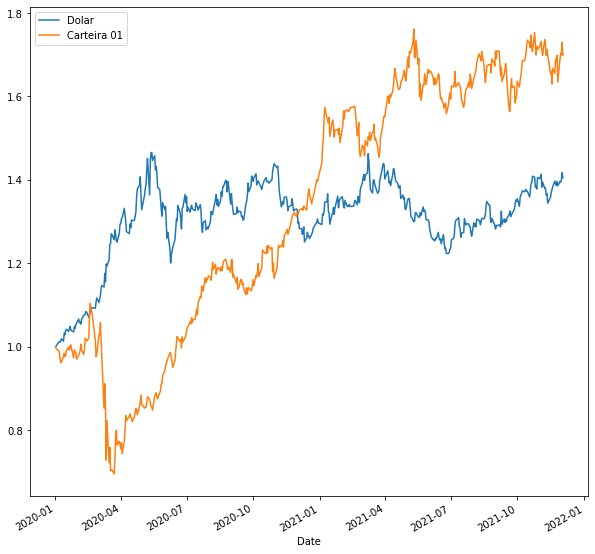

In [ ]:
PL_normalizado[['Dolar', 'Carteira 01']].plot(figsize = (10,10));

## Carteira 02

In [ ]:
ativos02 = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA', 'CIEL3.SA']

precos = pd.DataFrame()

for i in ativos02:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']


compras02 = {'PETR4.SA': 2000, 'VALE3.SA': 2000, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 
           'SMAL11.SA': 1500, 'AAPL34.SA': 500, 'IVVB11.SA': 700, 'CIEL3.SA': 2000}
           
compras_df02 = pd.Series(data=compras02, index=list(compras02.keys()))

primeiro02 = precos.iloc[0]

qtd_acoes02 = compras_df02/primeiro02

PL02 = precos*qtd_acoes02

PL02['Carteira 02'] = PL02.sum(axis = 1)

nova_02 = pd.merge(novo_df, PL02, how = 'inner', on = 'Date')

## Carteira 03

In [ ]:
ativos03 = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA',
          'SMAL11.SA', 'CIEL3.SA']

precos = pd.DataFrame()

for i in ativos03:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']


compras03 = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 
           'SMAL11.SA': 1500, 'CIEL3.SA': 2000}
           
compras_df03 = pd.Series(data=compras03, index=list(compras02.keys()))

primeiro03 = precos.iloc[0]

qtd_acoes03 = compras_df03/primeiro03

PL03 = precos*qtd_acoes03

PL03['Carteira 03'] = PL03.sum(axis = 1)

nova_03 = pd.merge(nova_02, PL03, how = 'inner', on = 'Date')

PL_normalizado_03 = nova_03/nova_03.iloc[0]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

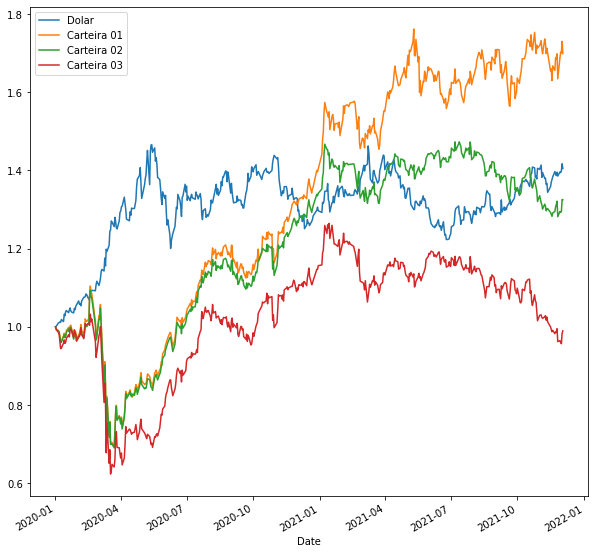

In [ ]:
PL_normalizado_03[['Dolar', 'Carteira 01', 'Carteira 02', 'Carteira 03']].plot(figsize = (10,10));